# AI4I 2020 classification
Dataset URL: https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC#
from sklearn.model_selection import GridSearchCV

## Data Acquisition

In [ ]:
# 3A
df = pd.read_csv('ai4i2020.csv')

In [ ]:
# 3B
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.2+ KB


In [ ]:
# 3C (first rows)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0


In [ ]:
# 3C (last rows)
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0


#### Ethical Considerations

"This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.
This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given."

Ethical considerations:
- Ensuring data privacy and anonymization compliance.
- Avoiding biased or unfair decision-making based on model predictions.
- Transparency in AI model usage in industrial applications.

## Data Exploration

In [ ]:
# 4A
df.describe()

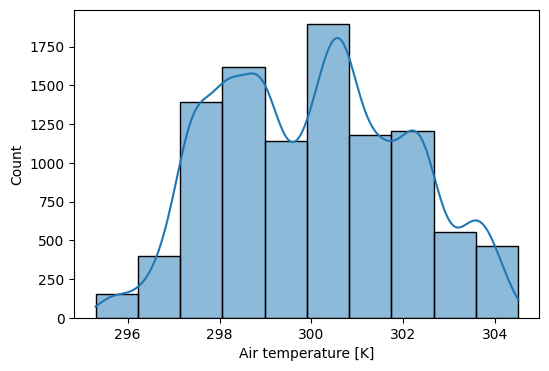

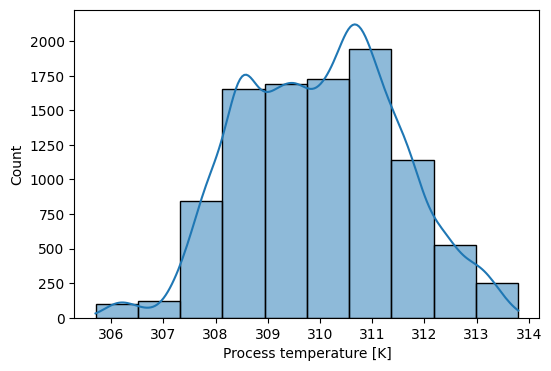

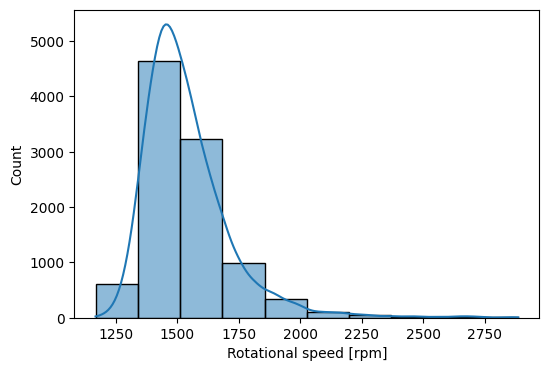

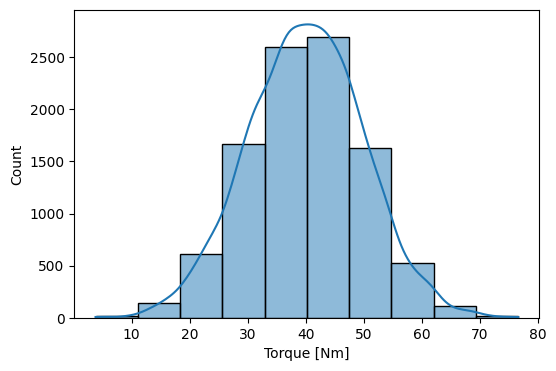

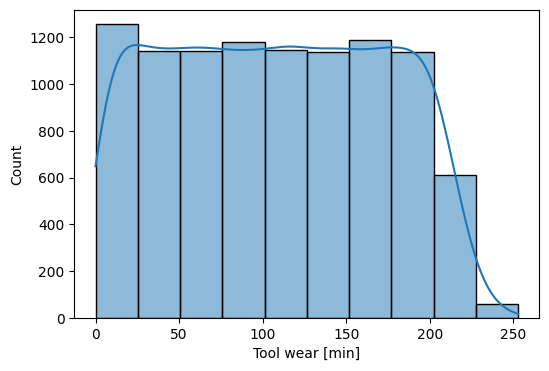

In [ ]:
predictors = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

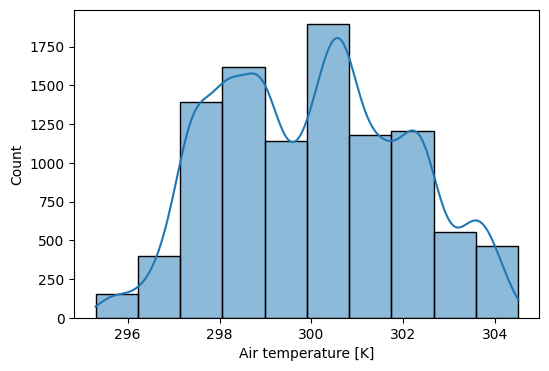

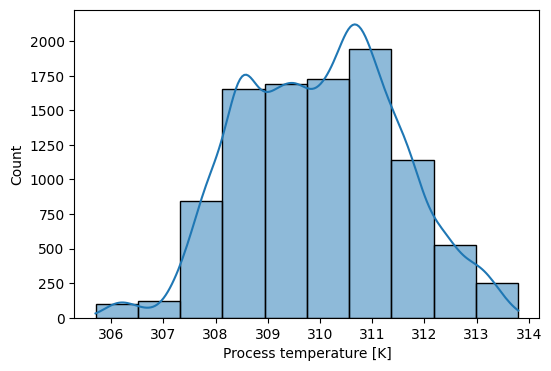

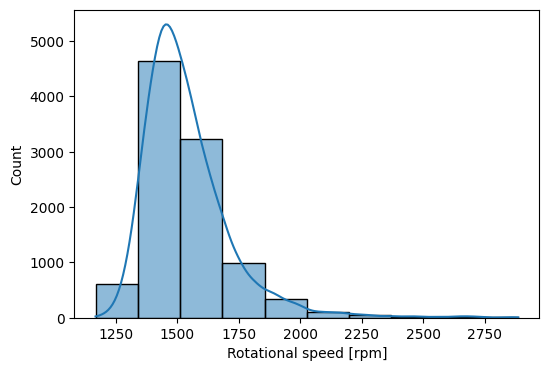

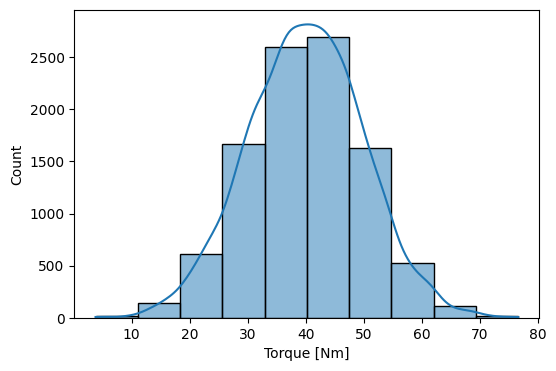

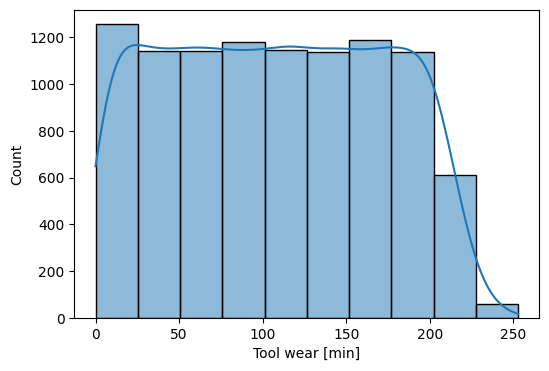

In [ ]:
# 4B
for predictor in predictors:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[predictor], bins=10, kde=True)
    plt.show()

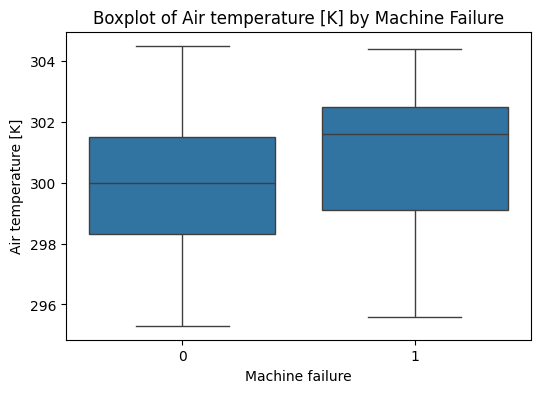

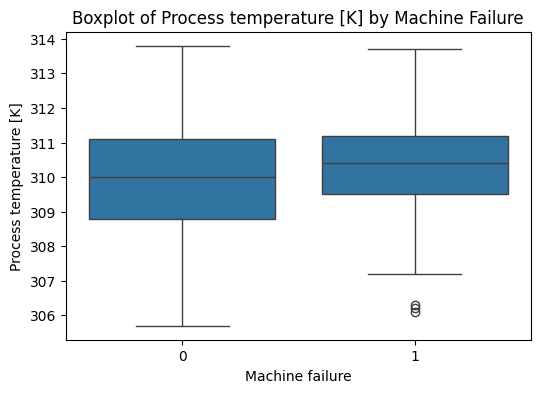

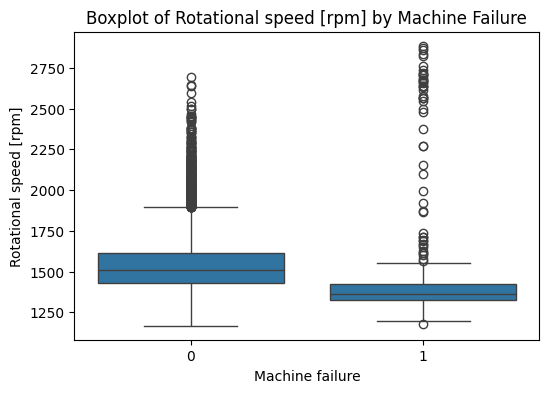

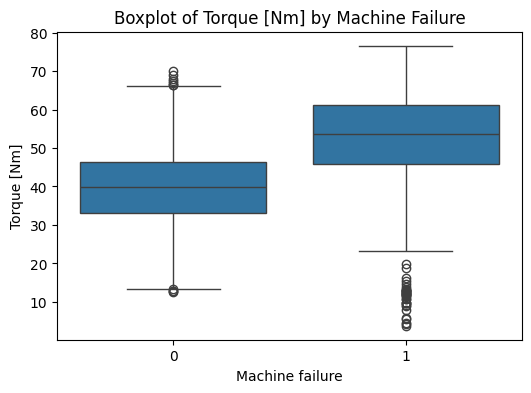

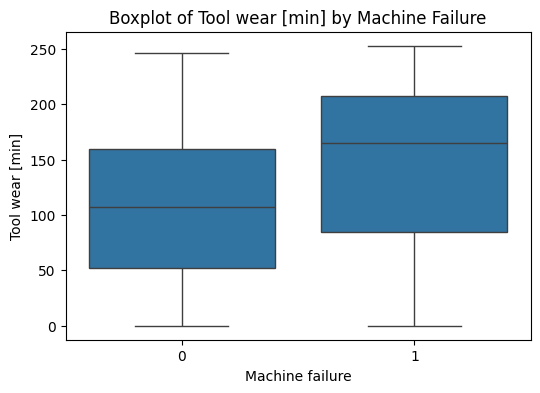

In [10]:
# 4C
for predictor in predictors:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Machine failure', y=predictor, data=df)
    plt.title(f'Boxplot of {predictor} by Machine Failure')
    plt.show()

In [15]:
# 4D
failureCounts = df['Machine failure'].value_counts(normalize=True) * 100
print(failureCounts)

Machine failure
0    96.61
1     3.39
Name: proportion, dtype: float64


## Data Preprocessing

In [23]:
# 5A
df.info()
dfClean = df.drop(columns=['UDI', 'Product ID', 'Type'])
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature

In [ ]:
# 5B
dfCopy = dfClean.copy()
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 468.9 KB


## Model Creation

In [ ]:
# 6A
X = dfCopy[predictors]
y = dfCopy['Machine failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
# 6B
rf = RandomForestClassifier()
svm = SVC()

rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC()

# 6C

Hyperparameter tuning, as suggested by its name, is the identification and setting of
the most optimal set of hyperparameters for a learning algorithm. These parameters will
affect the process, and therefore affect the result machine learning model.

^^^^ Reference in BibTeX
@article{article,
    author = {Ilemobayo, Justus and Durodola, Olamide and Alade, Oreoluwa and Awotunde, Opeyemi and Adewumi, Temitope and Falana, Olumide and Ogungbire, Adedolapo and Osinuga, Abraham and Ogunbiyi, Dabira and Odezuligbo, Ikenna and Edu, Oluwagbotemi and Ifeanyi, Ark},
    year = {2024},
    month = {06},
    pages = {388-395},
    title = {Hyperparameter Tuning in Machine Learning: A Comprehensive Review},
    volume = {26},
    journal = {Journal of Engineering Research and Reports},
doi = {10.9734/jerr/2024/v26i61188}
}

For random forest, the classifiers chosen are the number of estimators, and max depth
For SVC, the classifiers chosen are the C (regularization) and Kernel (methods of mapping data)

In [ ]:
# 6D (Random Forest)
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_params_)

{'max_depth': None, 'n_estimators': 100}


In [32]:
# 6D (SVC)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
gs_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
gs_svm.fit(X_train, y_train)
print(gs_svm.best_params_)

{'C': 1, 'kernel': 'linear'}


In [34]:
# 6E
best_rf = gs_rf.best_estimator_
best_svm = gs_svm.best_estimator_

y_pred_rf = best_rf.predict(X_test)
y_pred_svm = best_svm.predict(X_test)

print("Random Forest Performance")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("SVM Performance")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Random Forest Performance
[[1925    7]
 [  24   44]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.86      0.65      0.74        68

    accuracy                           0.98      2000
   macro avg       0.93      0.82      0.87      2000
weighted avg       0.98      0.98      0.98      2000

SVM Performance
[[1930    2]
 [  58   10]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.83      0.15      0.25        68

    accuracy                           0.97      2000
   macro avg       0.90      0.57      0.62      2000
weighted avg       0.97      0.97      0.96      2000



#### 7A
Shah et al.'s implementation had weaknesses which can be observed from the first phase of their research. The first observed limitation is the choice of data splitting strategy. The authors employed a standard train-test split without stratifying the data by the target variable, Machine failure, which increases the chance of sampling errors. Therefore, this approach introduces the risk of producing training and test sets that do not accurately reflect the full distribution of failure cases. This can lead to skewed model performance if the failure cases are underrepresented in either set.

Another limitation in Shah et al. approach is that they relied on a singular round of 5-fold cross-validation for model evaluation. This technique does not account for variability across different random data splits. A repeated cross-validation would have definitely provided a more robust estimate of model performance and better results across multiple rounds. Another limitation was the minimal emphasis on hyperparameter tuning. The study also did not undertake a structured exploration of model parameters, which is vital for maximizing predictive accuracy and minimizing both underfitting and overfitting.

#### 7B

Since me and Shah et al. share the same data splitting strategy, I also suffered from the same limitation of not using a stratified split. As a result, model performance could be misleading due to either overrepresentation or underrepresentation of the minority class. However, my implementation did improve on their methodology by implementing repeated cross-validation. Another limitation in my implementation is the limited hyperparameter tuning I performed for both Random Forest and Support Vector Machine where I only used two hyperparameters for each, which varied across 3 values each. The parameter grids could have definitely been more extensive. 

When it comes to model evaluation, I examined multiple performance metrics, including confusion matrices and classification reports. However,  the issue of class imbalance was not explored. Furthermore, the interpretability of the models was not explored in depth. Since this scenario follows an industrial application, understanding why a model makes certain predictions is just as important as the predictions themselves.

### Model exportation

In [ ]:
# 8
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)